In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_excel1 = pd.read_excel('data.xlsx', sheet_name='exp2')
P_i = data_excel1['P_i'].tolist()
P_f = data_excel1['P_f'].tolist()
P_f_real = np.subtract(76,P_f)
N = np.multiply(-1, data_excel1['delta_N'].tolist())
d = 3e-2
lam_0 = 633e-9

In [53]:
print(P_f_real)

[55.5 55.5 55.5 55.5 55.5 55.5 55.5 55.5 55.5 55.5 69.  66.5 64.  62.5
 61.  58.5 72.  68.  59.5]


[  0.72749541 -55.39130435]


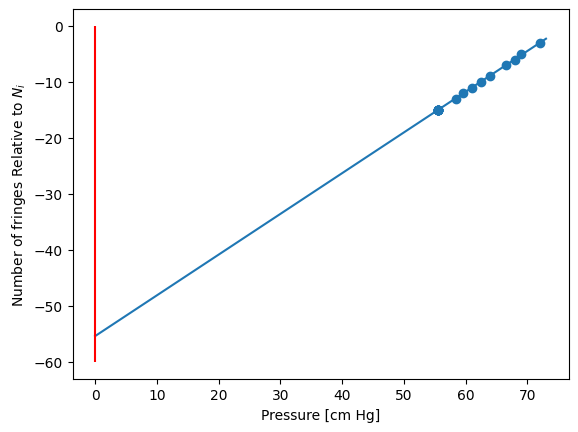

In [3]:
plt.scatter(np.subtract(76,P_f),N)

z1 = np.polyfit(P_f_real,N,1)
print(z1)
plt.plot(np.linspace(0,73,10), np.poly1d(z1)(np.linspace(0,73,10)))
plt.vlines(0, -60,0, 'r')
plt.xlabel('Pressure [cm Hg]')
plt.ylabel(r'Number of fringes Relative to $N_i$')
plt.show()

In [54]:
N_0 = 2*d/lam_0
d_n = np.divide(np.multiply(N,lam_0),(2*d))
slope =  np.divide(d_n,np.subtract(P_i,P_f))
print(N_0)
print(slope.mean(), slope.std())

94786.7298578199
7.752809055726934e-06 8.967393756182295e-08


Text(0, 0.5, 'Number of fringes = $N_i-N$')

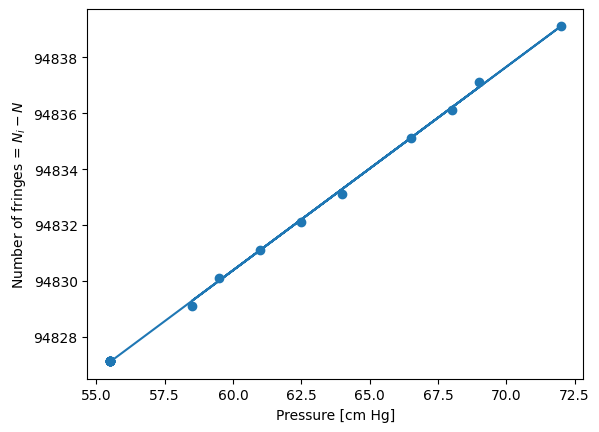

In [5]:
cali = N_0-z1[1]
N_real = np.add(N,cali)
plt.scatter(P_f_real,N_real)
z2 = np.polyfit(P_f_real,N_real,1)
plt.plot(P_f_real, np.poly1d(z2)(P_f_real))
plt.xlabel('Pressure [cm Hg]')
plt.ylabel(r'Number of fringes = $N_i-N$')

In [6]:
n_f_real =np.divide(lam_0, np.divide(2*d,N_real))

1.0000000000000002 1.000583305817514


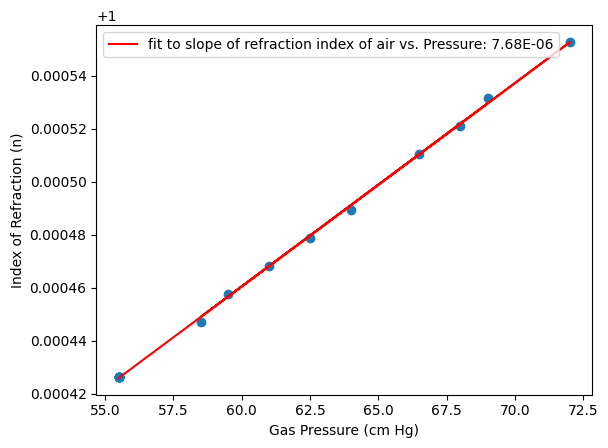

In [13]:
plt.scatter(P_f_real, n_f_real)
z3 = np.polyfit(P_f_real,n_f_real,1)
plt.plot(P_f_real, np.poly1d(z3)(P_f_real),color='r',label=f'fit to slope of refraction index of air vs. Pressure: {z3[0]:.2E}')
plt.xlabel('Gas Pressure (cm Hg)')
plt.ylabel('Index of Refraction (n)')
plt.legend()
print(np.poly1d(z3)(0),np.poly1d(z3)(76))

In [61]:
data_excel2 = pd.read_excel('data.xlsx', sheet_name='exp3')
degrees = data_excel2['Degrees'].tolist()
N_exp3 = data_excel2['N fringes'].tolist()
N_std = data_excel2['std'].tolist()[:4]
print(degrees,N_exp3)

[10, 10, 10, 15, 15, 15, 20, 20, 20, 25, 25, 25, 25, 25] [74, 69, 73, 154, 149, 155, 236, 230, 240, 135, 196, 142, 306, 420]


In [62]:
thetas = np.radians(degrees)
def calc_n_g (thetas,Ns,t):
    n_g = []
    for i, theta in enumerate(thetas):
        N=Ns[i]
        n_g.append(((2*t-N*lam_0)*(1-np.cos(theta))+N**2*lam_0**2/(4*t))/(2*t*(1-np.cos(theta))-N*lam_0))
    return np.asarray(n_g)
n_gs = calc_n_g(thetas,N_exp3,0.5e-2)

In [63]:
print(n_gs.mean(),n_gs.std())

1.3061075960960278 0.11549289983719813


In [65]:
degrees_ = data_excel2['degree'].tolist()[:4]
N_exp3_ = data_excel2['mean'].tolist()[:4]
thetas_ = np.radians(degrees_)
n_gs = calc_n_g(thetas_,N_exp3_,0.5e-2)
print(n_gs.mean(),n_gs.std())

1.3236824338301345 0.09396937336250574
